# Money creation example: Initialization
This notebook demonstrates the introduction of money into an economy.

We start by importing required utilities.

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger, Account, AccountSide

## Declaration of agents
We start by defining their agents and the accounts on their balance sheets:

In [2]:
bank = Ledger(residual_account_name="Equity")
private_agent = Ledger(residual_account_name="Equity")
central_bank = Ledger(residual_account_name="Equity")

bank.make_asset_accounts(['Cash','Loans','Reserves'])
bank.make_liability_accounts(['Deposits'])

private_agent.make_asset_accounts(['Cash','Deposits'])
private_agent.make_liability_accounts(['Loans'])

central_bank.make_asset_accounts(['Assets'])
central_bank.make_liability_accounts(['Reserves','Cash'])

We further define a function that computes the money stocks according to our defined taxonomy:

In [3]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    # Commercial bank money: bank liabilities that are money
    commercial_bank_money = bank.get_balance('Deposits')[1]
    
    # Central bank money: CB liabilities that are money and not held by a bank
    central_bank_money = private_agent.get_balance('Cash')[1]
    
    # no non-bank money in this example
    
    total_money = commercial_bank_money + central_bank_money
    
    if (commercial_bank_money > 0):
        print("Commercial Bank Money:",commercial_bank_money)
    if (central_bank_money > 0):
        print("Central Bank Money:",central_bank_money)
    print("Total Money:",total_money)

def print_balance_sheets_and_money_stocks():
    bank_balance_sheet = SVG(bank.draw_balance_sheet("Bank Balance Sheet"))
    private_agent_balance_sheet = SVG(private_agent.draw_balance_sheet("Private Agent Balance Sheet"))
    central_bank_balance_sheet = SVG(central_bank.draw_balance_sheet("Central Bank Balance Sheet"))
    
    display_svg(bank_balance_sheet, private_agent_balance_sheet, central_bank_balance_sheet)
    print_money_stocks()

## Start of the example
The bank and the private agent start with some endowments of central bank money, the central bank is assumed to have sufficient assets to start with 0 equity.

In [4]:
bank.book(debit=[('Cash',50)],credit=[('Equity',50)])
private_agent.book(debit=[('Cash',100)],credit=[('Equity',100)])
central_bank.book(debit=[('Assets',150)],credit=[('Cash',150)])

We can now inspect the balance sheets of the agents and the money stocks. We note that we are using the following color conventions: assets are colored in blue, liabilities in red and equity in green. Negative equity (which will occur in later examples) is coloured in dark red.

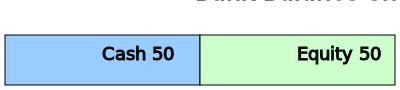

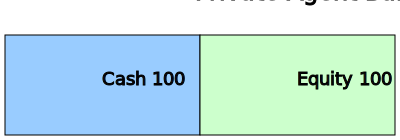

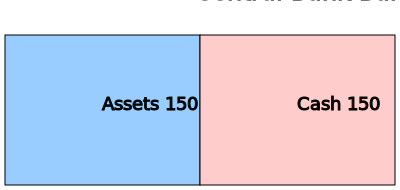

Central Bank Money: 100
Total Money: 100


In [5]:
print_balance_sheets_and_money_stocks()

Now the private agent transfers its cash to the bank (we see that the outside money is thereby converted to inside money, while the total money stock stays constant):

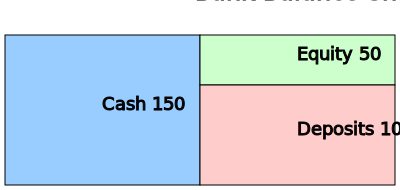

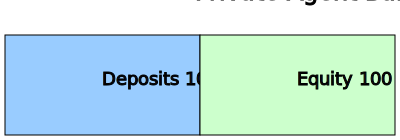

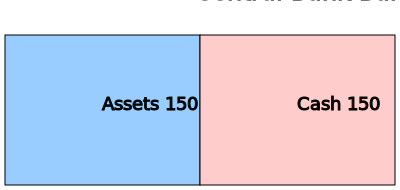

Commercial Bank Money: 100
Total Money: 100


In [6]:
private_agent.book(debit=[('Deposits',100)],credit=[('Cash',100)])
bank.book(debit=[('Cash',100)],credit=[('Deposits',100)])
print_balance_sheets_and_money_stocks()

The bank now converts all its cash into reserves at the central bank (this transaction again keeps the money stock constant):

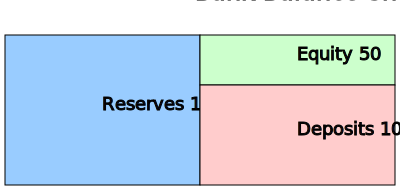

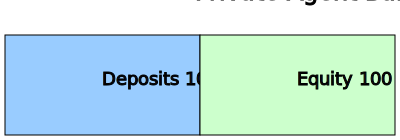

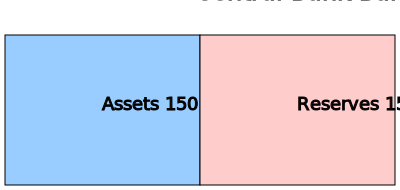

Commercial Bank Money: 100
Total Money: 100


In [7]:
bank.book(debit=[('Reserves',150)],credit=[('Cash',150)])
central_bank.book(debit=[('Cash',150)],credit=[('Reserves',150)])
print_balance_sheets_and_money_stocks()